## Tackling Classification problems

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

%matplotlib inline
sns.set()

Text(0, 0.5, 'feature 2')

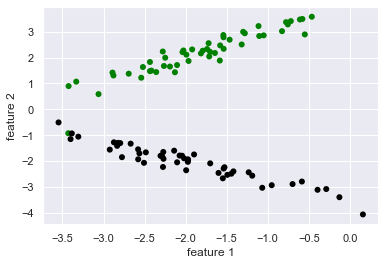

In [4]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           class_sep=2.0, random_state=101)
colors = list(map(lambda x: 'green' if x == 0 else 'black', y))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=colors, linewidths=0, edgecolors=None)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

## Assessing classifier's performance

In [5]:
# dummy variables
y_orig = [0,0,0,0,0,0,1,1,1,1]
y_pred = [0,0,0,0,1,1,1,1,1,0]

from sklearn.metrics import confusion_matrix, classification_report
rep = confusion_matrix(y_orig, y_pred)
print(rep)
print(classification_report(y_orig, y_pred))


[[4 2]
 [1 3]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



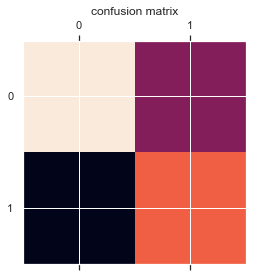

In [6]:
# visual representation
plt.matshow(rep)
plt.title('confusion matrix')
plt.show()

In [7]:
# two ways to show the accuracy score

# overall accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_orig, y_pred))

# accuracy of one specific label
from sklearn.metrics import precision_score
print(precision_score(y_orig, y_pred))

0.7
0.6


In [8]:
# recall
from sklearn.metrics import recall_score
print(recall_score(y_orig, y_pred))

0.75


In [9]:
# f1-score
from sklearn.metrics import f1_score
print(f1_score(y_orig, y_pred))

0.6666666666666665


Classification report shows 4 different things:
- precision: the number of correctly classified samples
- recall: the number out of which it was correctly classified (also called sensitivity)
- f1-score: measure of test's accuracy
- support: shows how many labels are in the test

If there's a sample [0, 0, 0, 0, 1] -> recall of zeros is 4/5 -> 0.8 or 80%

F1-score's formula: $2*\frac{precision*recall}{precision+recall}$

## Probability-based approach - the Foundation of Logistic Regression
$$P(y=1|x)=\sigma(W^T*x)$$, where $\sigma=\frac{1}{1+e^{-t}}$ (which is also known as Sigmoid function or inverse-logit function)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y.astype('float'), test_size=0.33, random_state=101)
print(y_test.dtype)
y_test

float64


array([0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.])

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
y_pred = np.clip(lr.predict(X_test), 0, 1)
# print(y_pred)
print(y_test)

print(list(map(lambda x: 1 if x > 0.5 else 0, y_pred)))

[0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 1. 0.]
[0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0]


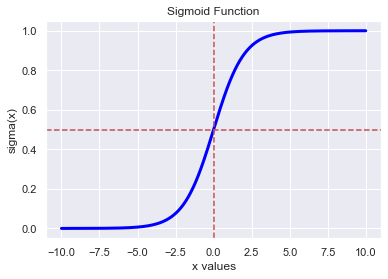

In [32]:
# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X_val = np.linspace(-10, 10, 1000)
lines = np.arange(-10, 11)
plt.title('Sigmoid Function')
plt.plot(X_val, sigmoid(X_val), color='blue', linewidth=3)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=0.0, color='r', linestyle='--')
plt.xlabel('x values')
plt.ylabel('sigma(x)')
plt.show()


In [34]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train, y_train.astype(int))
y_clf = clf.predict(X_test)

print(classification_report(y_test.astype(int), y_clf))



              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.95      1.00      0.97        18

    accuracy                           0.97        33
   macro avg       0.97      0.97      0.97        33
weighted avg       0.97      0.97      0.97        33



<ipython-input-35-2a41f1d6b724>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.pink)


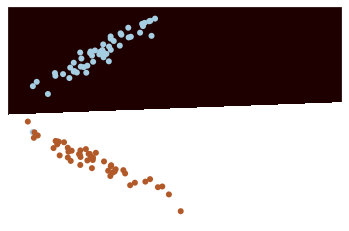

In [35]:
# visualize the results

h = 0.02
# plot the decision boundary. For that, we'll assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max]
x_min, x_max = X[:, 0].min() - .5, X[:, 1].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# put the results into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.pink)

# plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', linewidths=0, cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())
plt.show()


<ipython-input-38-6a5a20072696>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)
<ipython-input-38-6a5a20072696>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


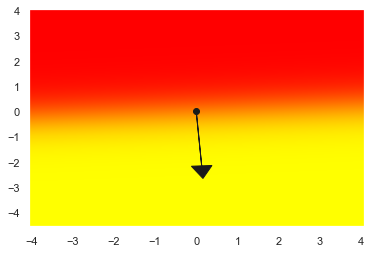

In [38]:
# now let's see the bare probabilities & weight vector. To compute probabilities, we need to use predict_proba method of
# the classifier. It returns two values: P(0) and P(1)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.autumn)

ax = plt.axes()
ax.arrow(0, 0, clf.coef_[0][0], clf.coef_[0][1], head_width=0.5, head_length=0.5, fc='k', ec='k')
plt.scatter(0, 0, marker='o', c='k')


## Pros & Cons of Logistic Regression
### Pros
- super fast
- has an extension - multiclass classification

### Cons
- prone to underfitting (boundary has to be a line or a hyperplane)
- can't work with non-linear values

